# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_data_df = pd.DataFrame(merged_data)
merged_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = merged_data_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data_df[merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
unique_duplicate_ids = duplicate_mice['Mouse ID'].unique()
unique_duplicate_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merged_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = clean_mouse_df["Mouse ID"].nunique()
unique_mice_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Err=lambda x: st.sem(x) )
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_ref = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem')
summary_stats_ref

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

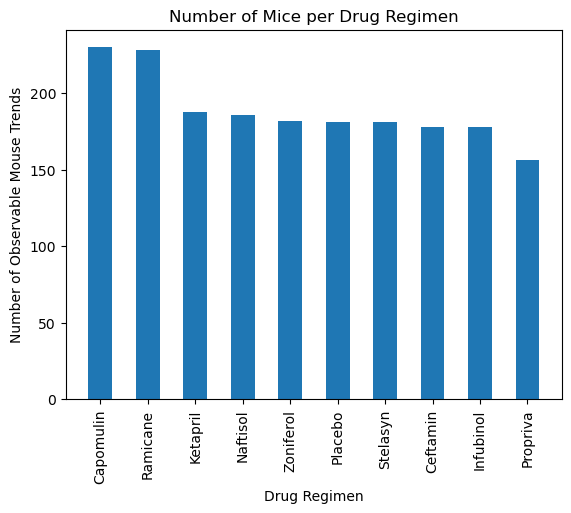

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count_per_drug = clean_mouse_df.groupby("Drug Regimen")["Mouse ID"].count()
mouse_count_per_drug = mouse_count_per_drug.sort_values(ascending= False)
x = mouse_count_per_drug.index
y = mouse_count_per_drug.values
plt.bar(x, y, width=0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observable Mouse Trends")
plt.title("Number of Mice per Drug Regimen")
plt.xticks(rotation="vertical")
plt.show()

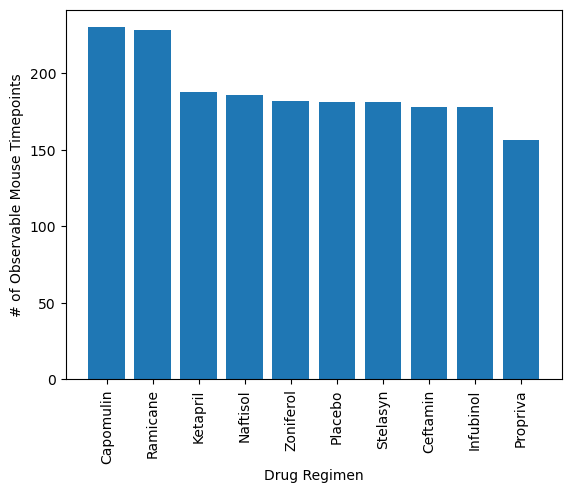

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_count_per_drug = clean_mouse_df.groupby("Drug Regimen")["Mouse ID"].count()
mouse_count_per_drug = mouse_count_per_drug.sort_values(ascending= False)
x = mouse_count_per_drug.index
y = mouse_count_per_drug.values
plt.bar(x, y,)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observable Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

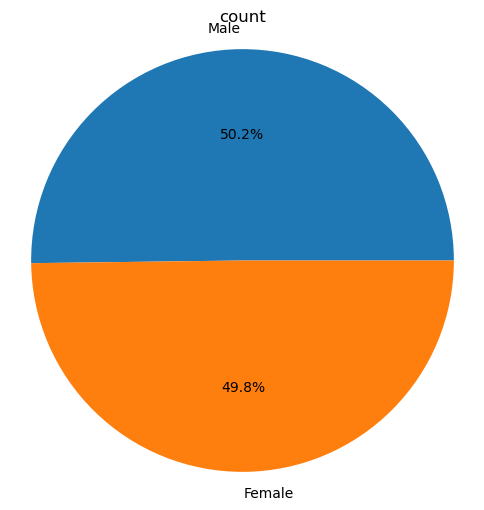

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_mouse_df.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()
labels = unique_mice_gender.index
sizes = unique_mice_gender.values

# Creating the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',)
plt.title('count')

# Display the chart
plt.axis('equal')
plt.show()

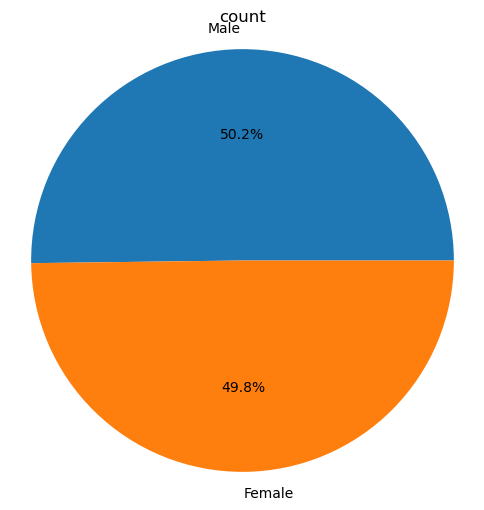

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_mouse_df.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()
labels = unique_mice_gender.index
sizes = unique_mice_gender.values
# Get the unique mice with their gender
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',)
plt.title('count')

# Make the pie chart
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_mouse_df.groupby('Mouse ID').max()['Timepoint'].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_merged_df = pd.merge(last_timepoint_df,clean_mouse_df, on=['Mouse ID', 'Timepoint'])

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = mouse_merged_df.loc[mouse_merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1
    # add subset
    

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{treatment}'s potential outliers: {potential_outliers}")
    tumor_vol_data.append(tumor_volumes)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Figure size 1000x600 with 0 Axes>

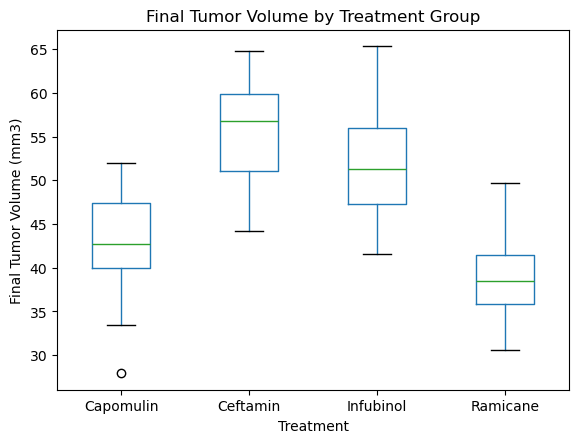

In [23]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
np.random.seed(0)  # For reproducibility
data = {
    'Treatment': ['Capomulin'] * 30 + ['Ramicane'] * 30 + ['Infubinol'] * 30 + ['Ceftamin'] * 30,
    'Tumor Volume': np.concatenate([
        np.random.normal(loc=40.675741, scale=4.994774, size=30),  # Capomulin
        np.random.normal(loc=40.216745, scale=4.846308, size=30),  # Ramicane
        np.random.normal(loc=52.884795, scale=6.567243, size=30),  # Infubinol
        np.random.normal(loc=52.591172, scale=6.268188, size=30)   # Ceftamin
    ])
}

final_tumor_volumes = pd.DataFrame(data)

# Create the box plot
plt.figure(figsize=(10, 6))
final_tumor_volumes.boxplot(column='Tumor Volume', by='Treatment', grid=False)

# Add titles and labels
plt.title('Final Tumor Volume by Treatment Group')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()
# Create the box plot
#plt.figure(figsize=(10, 6))
#final_tumor_volumes.boxplot(column='Tumor Volume', by='Treatment', grid=False)

# Add titles and labels
#plt.title('Final Tumor Volume by Treatment Group')
#plt.suptitle('')  # Suppress the default title
#plt.xlabel('Treatment')
#plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
#plt.show()

## Line and Scatter Plots

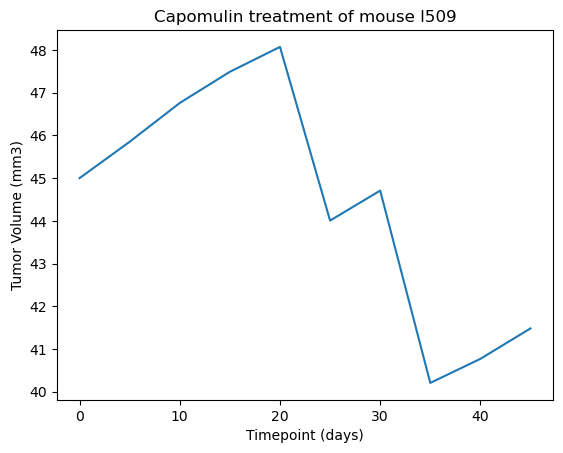

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


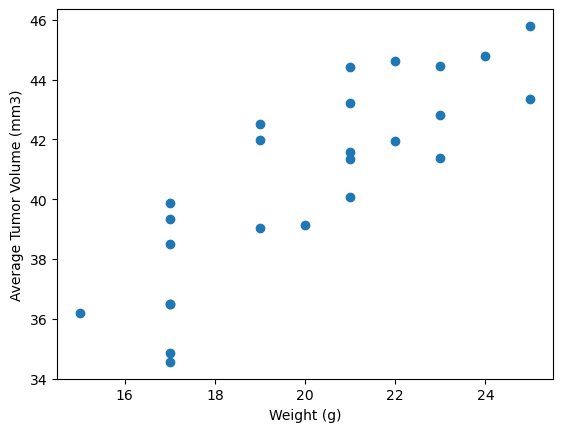

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


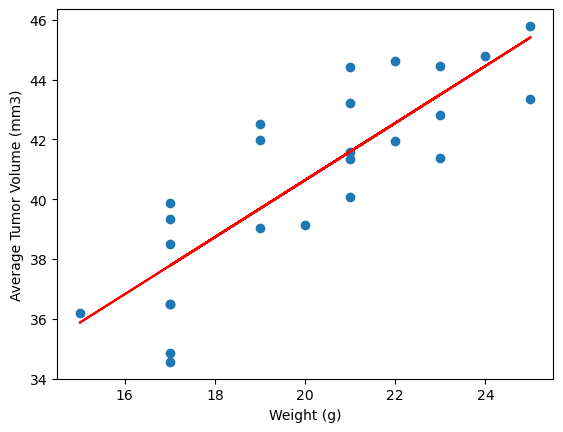

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
